# ЛР_4(10) Цифровая обработка бинарных изображений

### Задание 4.1. Изменить размер изображения.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def img_print(original, res):
    pose = [121, 122]
    signature = ["Оригинал", "Измененное"]
    img = [original, res]
    i = 0
    while i < 2:
        plt.subplot(pose[i])
        plt.title(signature[i])
        plt.imshow(img[i])
        i += 1
    return 0

In [100]:
img = cv2.imread('pic/Cat.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Первый способ изменения размера задается в процентах

Resized Dimensions :  (382, 350, 3)


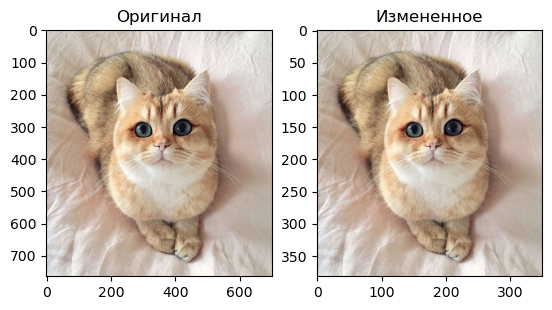

In [101]:
scale_percent = 50
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
print('Resized Dimensions : ', resized.shape)
img_print(img, resized);

Второй способ, изменения размера задается вручную

In [102]:
print('Original Dimensions : ',img.shape)
width = 58
height = 71
dim1 = (width, height)

Original Dimensions :  (764, 700, 3)


Resized Dimensions :  (71, 58, 3)


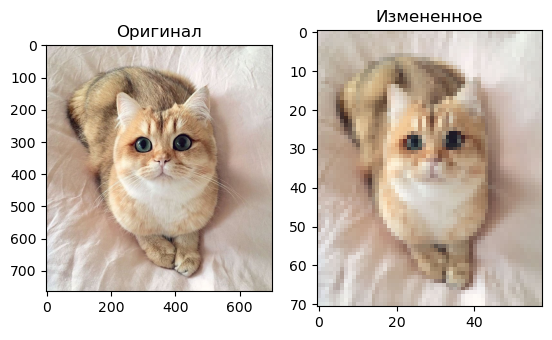

In [103]:
resized1 = cv2.resize(img, dim1, interpolation=cv2.INTER_AREA)
print('Resized Dimensions : ', resized1.shape)
img_print(img, resized1);

Третий способ: задается коэффициентом масштабирования

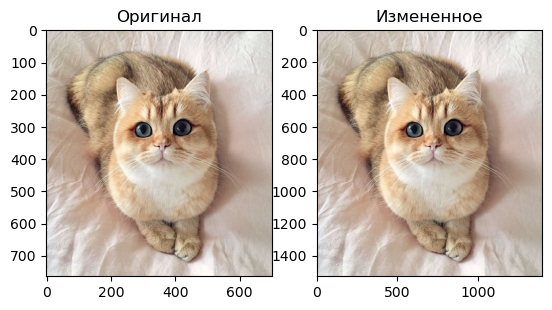

In [104]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
img_print(img, res);

### Задание 4.2 Определить размер изображения и сдвинуть изображение на 100 столбцов и 50 строк.

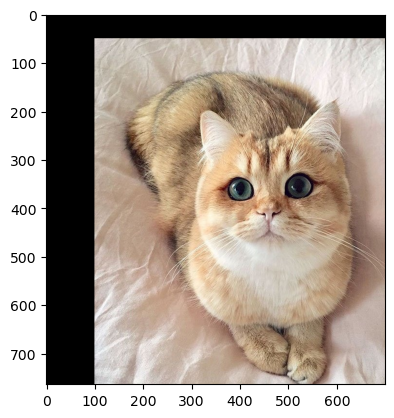

In [105]:
rows,cols,colors = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst);

### Задание 4.3 Определить размер изображения, его центр и повернуть его на 90 градусов.

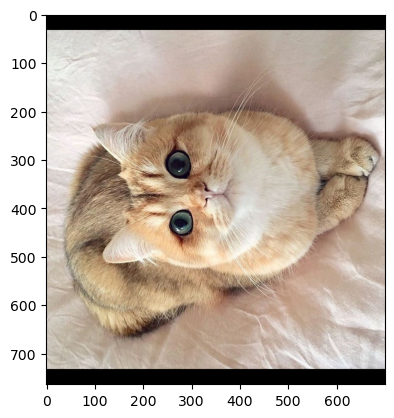

In [106]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst);

### Задание 4.4 Определить размер изображения, задать 3 точки, изменить их координаты и провести аффинное преобразование всего изображения по этим точкам

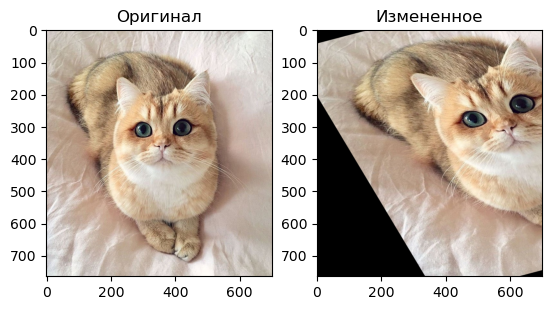

In [107]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

img_print(img, dst);
plt.show()

### Задание 4.5 Провести охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной. Перед выполнением заданий, используя вставку в Microsoft office «создать фигуры правильной формы», создайте фигуру бинарного изображения, скопируйте в Paint и сохраните в файле с расширением jpg или png. Созданное бинарное изображение должно быть инвертированным, т. е. эти фигуры должно быть темными, тогда прямоугольник, круг, эллипс, которые охватывают эти фигуры, будут хорошо видны.

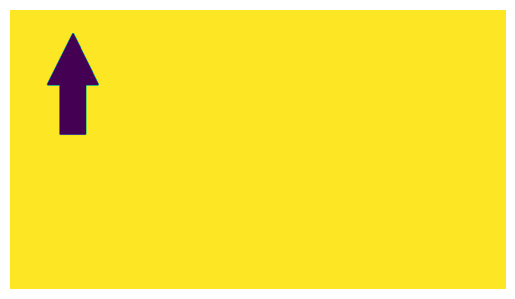

In [108]:
img = cv2.imread('pic/strelka.jpg', 0)
plt.axis('off')
plt.imshow(img);

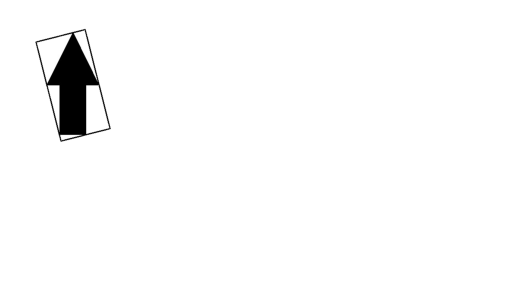

In [109]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)

cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.intp(box)

imp = cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);

### Задание 4.6 Провести охват изображения в круг.

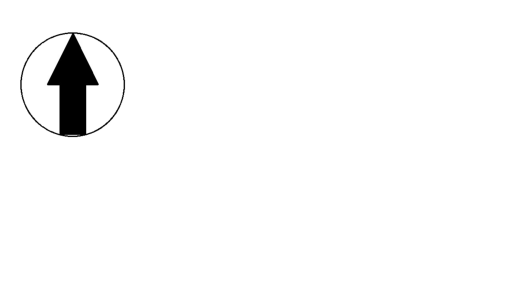

In [110]:
image = cv2.imread('pic/strelka.jpg', 0)

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)

imp = cv2.circle(image,center,radius,(0,255,0),2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);

### Задание 4.7 Провести охват изображения в элипс.

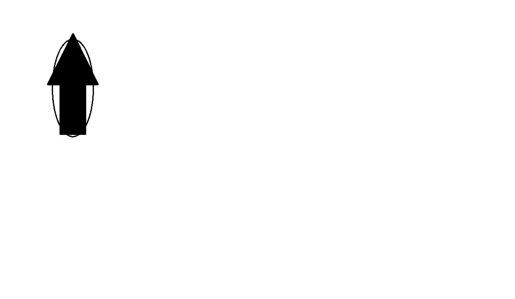

In [111]:
image = cv2.imread('pic/strelka.jpg', 0)

ellipse = cv2.fitEllipse(cnt)
imag = cv2.ellipse(image,ellipse,(0,255,0),2)

imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imag);

### Задание 4.8 Провести прямую линию вдоль оси симметрии изображения

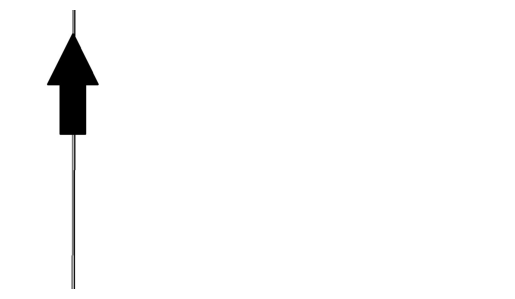

In [112]:
img = cv2.imread('pic/strelka.jpg', 0)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
inv = cv2.bitwise_not(thresh)

contours, hierarchy = cv2.findContours(inv, 1, 1)
cnt = contours[0]
rows,cols = inv.shape[:2]

[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)

lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img);

### Задание 4.9 Нарисовать контур, охватывающий изображение, толщиной 2, вывести полученное изображение на экран.

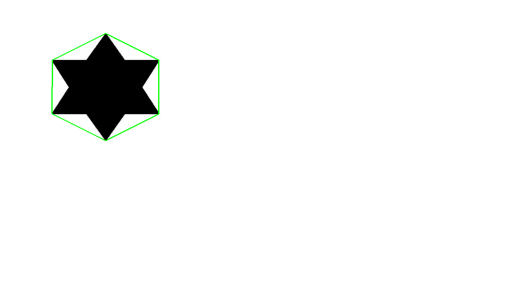

In [113]:
image = cv2.imread('pic/zvezda.jpg')
original_image = image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50,200)
contours, hierarchy= cv2.findContours(edges.copy(),
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    hull= cv2.convexHull(cnt)
    cv2.drawContours(image, [hull],0,(0,255,0),2)
plt.axis('off')
plt.imshow(image);

### Задание 4.10 Выполнить аппроксимацию контура, полагая epsilon = 1%, epsilon = 5% и epsilon = 10%.

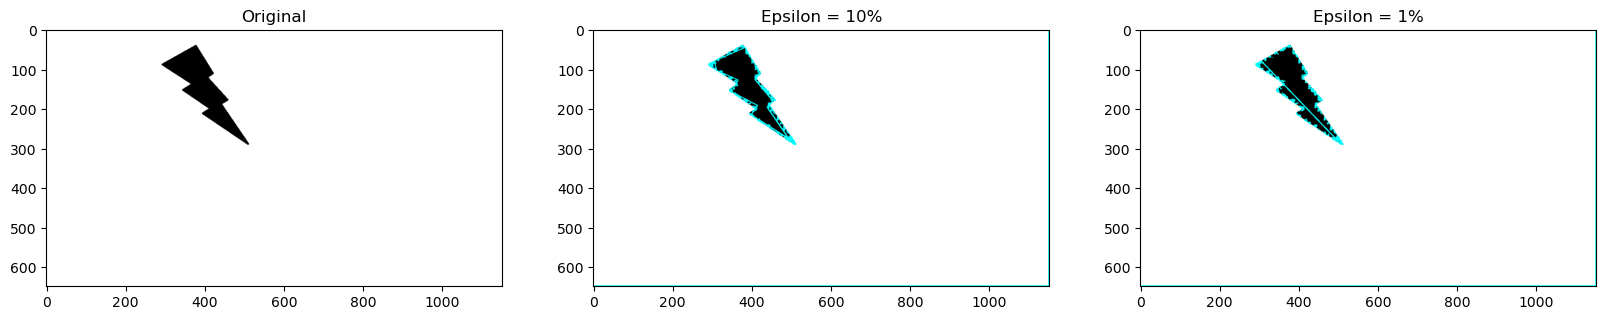

In [114]:

img = cv2.imread('pic/bin2.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 3)

imag = cv2.imread('pic/bin2.jpg')

f = plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img,'gray')

plt.subplot(1,3,2)
plt.title('Epsilon = 10%')
for i in range(np.size(contours)):
    cnt = contours [i]
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    cv2.drawContours(imag,[approx],-1,(0,255,255),2)
plt.imshow(imag)

plt.subplot(1,3,3)
plt.title('Epsilon = 1%')
imAg = cv2.imread('pic/bin2.jpg')
for i in range(np.size(contours)):
    cnt = contours [i]
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    cv2.drawContours(imAg,[approx],-1,(0,255,255),2)
plt.imshow(imAg)
plt.show();

### Задание 4.11 Нарисовать прямоугольник в месте, где нужно вырезать фрагмент , вывести на экран фрагмент, ограниченный прямоугольником, увеличив этот фрагмент. Определить размер изображения, его центр и повернуть его на 90 градусов.

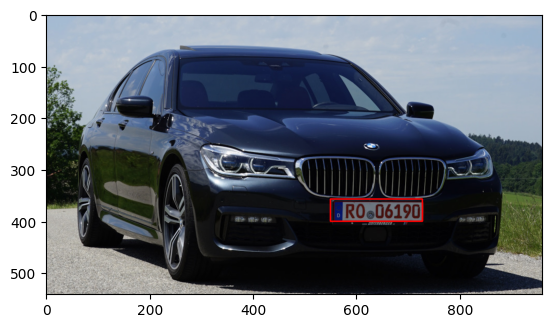

In [4]:
img = cv2.imread('pic/avto.jpg', 1)
image = cv2.rectangle(img, (550, 357), (728, 400), (0, 0, 255), 2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

200 100


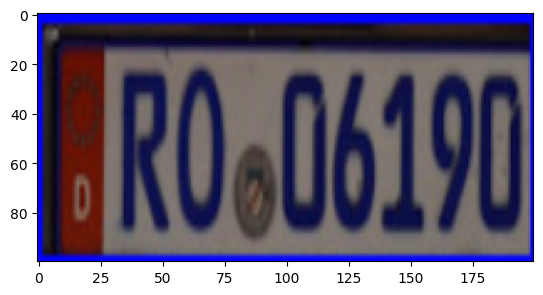

In [5]:
crop = img[357:400, 550:728]
piece = cv2.resize(crop, (200,100), interpolation=cv2.INTER_LINEAR)

(h, w) = piece.shape[:2]
print(w,h)

plt.imshow(piece);

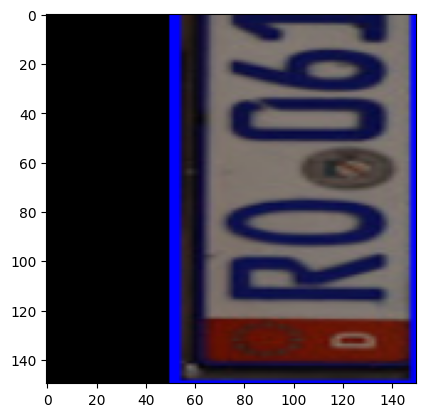

In [6]:
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 90, 1)
rotated = cv2.warpAffine(piece, M, (150, 150))

plt.imshow(rotated);